## 1 Classification

In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [21]:
# Read the data
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

In [22]:
adult.columns = ['Age', 'Type_employer', 'Fnlwgt', 'Education',
                 'Education_num', 'Marital', 'Occupation',
                 'Relationship', 'Race', 'Sex','Capital_gain', 
                 'Capital_loss', 'Hr_per_week','Country', 'Wage']

In [23]:
adult

,Age,Type_employer,Fnlwgt,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
# Feature Selection and Encoding
from sklearn.preprocessing import LabelEncoder

In [25]:
adult = adult.apply(LabelEncoder().fit_transform)
adult

,Age,Type_employer,Fnlwgt,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


### 1.1 Logistic Regression

In [29]:
drop_elements = ['Fnlwgt', 'Wage']
y = adult['Wage']
X = adult.drop(drop_elements, axis=1)
X.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred_logic = lr.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred_logic).sum())

Misclassified examples: 1701


In [32]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_logic))

Accuracy: 0.826


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logic))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7417
           1       0.71      0.46      0.56      2352

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.73      9769
weighted avg       0.81      0.83      0.81      9769



In [34]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confmat_logic = confusion_matrix(y_true=y_test, y_pred=y_pred_logic)
print(confmat_logic)

[[6976  441]
 [1260 1092]]


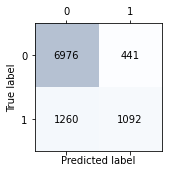

In [35]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat_logic, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_logic.shape[0]):
    for j in range(confmat_logic.shape[1]):
        ax.text(x=j, y=i, s=confmat_logic[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

In [36]:
#from confusion matrix calculate accuracy, sensitivity, and specificity

total_logic=sum(sum(confmat_logic))

accuracy1=(confmat_logic[0,0]+confmat_logic[1,1])/total_logic
print ('Accuracy_logic: ', accuracy1)

sensitivity1 = confmat_logic[0,0]/(confmat_logic[0,0]+confmat_logic[0,1])
print('Sensitivity_logic: ', sensitivity1 )

specificity1 = confmat_logic[1,1]/(confmat_logic[1,0]+confmat_logic[1,1])
print('Specificity_logic: ', specificity1)

Accuracy_logic:  0.8258777766403931
Sensitivity_logic:  0.9405419981124444
Specificity_logic:  0.4642857142857143


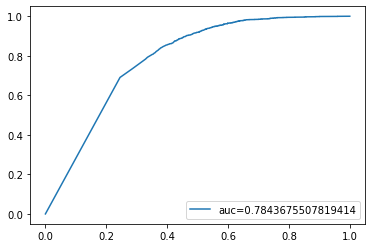

In [37]:
from sklearn import metrics

y_pred_proba1 = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 1.2 Support Vector Machine

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)

model = svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)
y_test_score = model.decision_function(X_test)
prediction = model.predict(X_test)
print(y_test_score)
print(prediction)

[ 5.20659596 72.04883549  9.6663862  ...  6.86215608  7.0242924
  9.54965617]
[1 1 1 ... 1 1 1]


In [42]:
# The classification accuracy of the perceptron on the test set as follows:

from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_svm))

Accuracy: 0.807


In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7417
           1       0.75      0.30      0.43      2352

    accuracy                           0.81      9769
   macro avg       0.78      0.63      0.66      9769
weighted avg       0.80      0.81      0.77      9769



In [44]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confmat_svm = confusion_matrix(y_true=y_test, y_pred=y_pred_svm)
print(confmat_svm)

[[7177  240]
 [1648  704]]


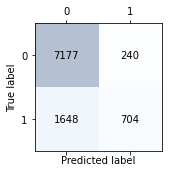

In [45]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_svm.shape[0]):
    for j in range(confmat_svm.shape[1]):
        ax.text(x=j, y=i, s=confmat_svm[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

In [46]:
#from confusion matrix calculate accuracy, sensitivity, and specificity

total_svm=sum(sum(confmat_svm))

accuracy2=(confmat_svm[0,0]+confmat_svm[1,1])/total_svm
print ('Accuracy_svm: ', accuracy2)

sensitivity2 = confmat_svm[0,0]/(confmat_svm[0,0]+confmat_svm[0,1])
print('Sensitivity_svm: ', sensitivity2 )

specificity2 = confmat_svm[1,1]/(confmat_svm[1,0]+confmat_svm[1,1])
print('Specificity_svm: ', specificity2)

Accuracy_svm:  0.8067355921793428
Sensitivity_svm:  0.9676419037346636
Specificity_svm:  0.29931972789115646


[ 5.20659596 72.04883549  9.6663862  ...  6.86215608  7.0242924
  9.54965617]
[1 1 1 ... 1 1 1]


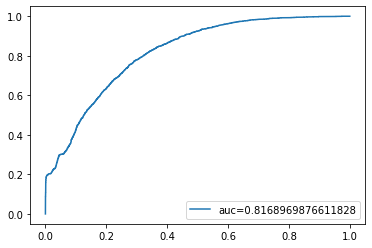

In [47]:
y_test_score = model.decision_function(X_test)
prediction = model.predict(X_test)
print(y_test_score)
print(prediction)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_score)
auc = metrics.roc_auc_score(y_test, y_test_score)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 1.3 Random Forest

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [51]:
y_pred_RandomForest = forest.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_RandomForest))

Accuracy: 0.847


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_RandomForest))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7417
           1       0.71      0.62      0.66      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [54]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confmat_RF = confusion_matrix(y_true=y_test, y_pred=y_pred_RandomForest)
print(confmat_RF)

[[6817  600]
 [ 892 1460]]


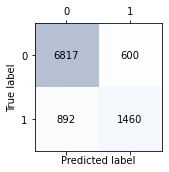

In [55]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat_RF, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_RF.shape[0]):
    for j in range(confmat_RF.shape[1]):
        ax.text(x=j, y=i, s=confmat_RF[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

In [56]:
#from confusion matrix calculate accuracy, sensitivity, and specificity

total_RF=sum(sum(confmat_RF))

accuracy3=(confmat_RF[0,0]+confmat_RF[1,1])/total_RF
print ('Accuracy_RF: ', accuracy3)

sensitivity3 = confmat_RF[0,0]/(confmat_RF[0,0]+confmat_RF[0,1])
print('Sensitivity_RF: ', sensitivity3)

specificity3 = confmat_RF[1,1]/(confmat_RF[1,0]+confmat_RF[1,1])
print('Specificity_RF: ', specificity3)

Accuracy_RF:  0.8472719828027434
Sensitivity_RF:  0.919104759336659
Specificity_RF:  0.6207482993197279


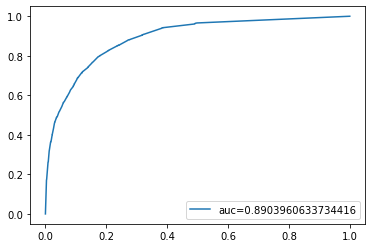

In [57]:
y_pred_proba3 = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc = metrics.roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 1.4 K-nearest neighbor (KNN)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, 
                           p=13, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=8, p=13)

In [62]:
y_pred_KNN = knn.predict(X_test_std)

In [63]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_KNN))

Accuracy: 0.838


In [64]:
from sklearn.metrics import classification_report

y_pred_KNN = knn.predict(X_test_std)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7417
           1       0.71      0.55      0.62      2352

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [65]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confmat_KNN = confusion_matrix(y_true=y_test, y_pred=y_pred_KNN)
print(confmat_KNN)

[[6887  530]
 [1049 1303]]


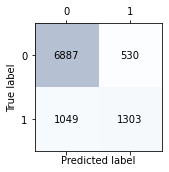

In [66]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat_KNN, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_KNN.shape[0]):
    for j in range(confmat_KNN.shape[1]):
        ax.text(x=j, y=i, s=confmat_KNN[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

In [67]:
#from confusion matrix calculate accuracy, sensitivity, and specificity

total_KNN=sum(sum(confmat_KNN))

accuracy4=(confmat_KNN[0,0]+confmat_KNN[1,1])/total_KNN
print ('Accuracy_KNN: ', accuracy4)

sensitivity4 = confmat_KNN[0,0]/(confmat_KNN[0,0]+confmat_KNN[0,1])
print('Sensitivity_KNN: ', sensitivity4 )

specificity4 = confmat_KNN[1,1]/(confmat_KNN[1,0]+confmat_KNN[1,1])
print('Specificity_KNN: ', specificity4)

Accuracy_KNN:  0.8383662606203296
Sensitivity_KNN:  0.9285425374140488
Specificity_KNN:  0.5539965986394558


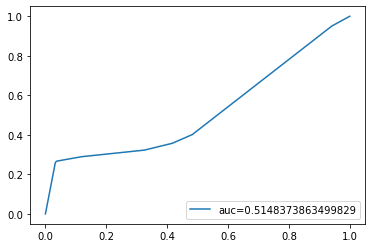

In [129]:
y_pred_proba4 = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba4)
auc = metrics.roc_auc_score(y_test, y_pred_proba4)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 1.5 DNN

In [69]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [70]:
import platform
print(platform.platform())

Windows-10-10.0.18362-SP0


In [71]:
adult

,Age,Type_employer,Fnlwgt,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


In [72]:
drop_elements = ['Fnlwgt']
adult = adult.drop(drop_elements, axis=1)
adult 

,Age,Type_employer,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,22,7,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,11,8,4,1,3,4,1,0,0,19,39,0


In [73]:
adult_norm = (adult - adult.min()) / (adult.max() - adult.min())
adult_norm

,Age,Type_employer,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,0.305556,0.875,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.211864,0.0,0.419355,0.951220,0.0
1,0.458333,0.750,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.129032,0.951220,0.0
2,0.291667,0.500,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.000000,0.0,0.419355,0.951220,0.0
3,0.500000,0.500,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.419355,0.951220,0.0
4,0.152778,0.500,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.419355,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.138889,0.500,0.466667,0.733333,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.397849,0.951220,0.0
32557,0.319444,0.500,0.733333,0.533333,0.333333,0.500000,0.0,1.0,1.0,0.000000,0.0,0.419355,0.951220,1.0
32558,0.569444,0.500,0.733333,0.533333,1.000000,0.071429,0.8,1.0,0.0,0.000000,0.0,0.419355,0.951220,0.0
32559,0.069444,0.500,0.733333,0.533333,0.666667,0.071429,0.6,1.0,1.0,0.000000,0.0,0.204301,0.951220,0.0


In [74]:
adult_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,0.299727,0.189382,0.0,0.152778,0.277778,0.430556,1.0
Type_employer,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
Education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
Education_num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
Marital,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
Occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
Relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
Race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
Sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0
Capital_gain,32561.0,0.055095,0.197460,0.0,0.000000,0.000000,0.000000,1.0


In [75]:
# Shuffle data and convert to numpy array
import numpy as np

# frac=1: Mix everything
adult_shuffle = adult_norm.sample(frac=1)
adult_shuffle

,Age,Type_employer,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
11521,0.361111,0.500,0.600000,0.800000,0.333333,0.285714,0.0,0.50,1.0,0.79661,0.0,0.419355,0.951220,1.0
11907,0.513889,0.500,0.733333,0.533333,0.000000,1.000000,0.2,1.00,1.0,0.00000,0.0,0.473118,0.951220,0.0
15286,0.736111,0.000,0.533333,0.666667,0.666667,0.000000,0.2,1.00,1.0,0.00000,0.0,0.311828,0.951220,0.0
4856,0.208333,0.500,0.733333,0.533333,0.666667,0.857143,0.2,1.00,0.0,0.00000,0.0,0.526882,0.951220,0.0
9460,0.444444,0.875,1.000000,0.600000,0.666667,0.071429,0.2,1.00,0.0,0.00000,0.0,0.419355,0.951220,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19489,1.000000,0.500,0.733333,0.533333,0.333333,0.500000,0.0,1.00,1.0,0.00000,0.0,0.419355,0.951220,0.0
21599,0.500000,0.625,0.666667,1.000000,0.333333,0.714286,0.0,1.00,1.0,0.00000,0.0,0.419355,0.951220,1.0
20223,0.250000,0.500,0.733333,0.533333,0.666667,0.500000,0.2,1.00,1.0,0.00000,0.0,0.419355,0.951220,0.0
9843,0.111111,0.500,0.133333,0.466667,0.333333,0.500000,0.4,0.75,1.0,0.00000,0.0,0.419355,0.634146,0.0


In [76]:
adult_np = adult_shuffle.to_numpy()
print(adult_np[:5])

[[0.36111111 0.5        0.6        0.8        0.33333333 0.28571429
  0.         0.5        1.         0.79661017 0.         0.41935484
  0.95121951 1.        ]
 [0.51388889 0.5        0.73333333 0.53333333 0.         1.
  0.2        1.         1.         0.         0.         0.47311828
  0.95121951 0.        ]
 [0.73611111 0.         0.53333333 0.66666667 0.66666667 0.
  0.2        1.         1.         0.         0.         0.31182796
  0.95121951 0.        ]
 [0.20833333 0.5        0.73333333 0.53333333 0.66666667 0.85714286
  0.2        1.         0.         0.         0.         0.52688172
  0.95121951 0.        ]
 [0.44444444 0.875      1.         0.6        0.66666667 0.07142857
  0.2        1.         0.         0.         0.         0.41935484
  0.95121951 0.        ]]


In [77]:
# Separation into train data and test data
import tensorflow as tf

train_idx = int(len(adult) * 0.7)
X_train, y_train = adult_np[:train_idx, :-1], adult_np[:train_idx, -1]
X_test, y_test = adult_np[train_idx:, :-1], adult_np[train_idx:, -1]
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

[0.36111111 0.5        0.6        0.8        0.33333333 0.28571429
 0.         0.5        1.         0.79661017 0.         0.41935484
 0.95121951]
1.0
[0.25       0.         0.73333333 0.53333333 0.66666667 0.
 0.6        1.         1.         0.         0.         0.41935484
 0.95121951]
0.0


In [78]:
random_seed = 123
np.random.seed(random_seed)

In [79]:
# One-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train)
print('First 10 labels: ', y_train[:10])

First 10 labels:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [80]:
print('\n First 10 labels: (one-hot): \n', y_train_onehot[:10])


 First 10 labels: (one-hot): 
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [81]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=50,
        input_dim=X_train.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=50,
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=y_train_onehot.shape[1],
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax'))

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 3,352
Trainable params: 3,352
Non-trainable params: 0
_________________________________________________________________


In [83]:
# lr: learning_rate learning rate, 
# decay: learning rate decay constant to adjust the learning rate for each epoch, 
# momentum: momentum value
sgd_optimizer = tf.keras.optimizers.SGD(
    lr=0.001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer,
    loss='categorical_crossentropy')

In [84]:
history = model.fit(X_train, y_train_onehot,
    batch_size=64, epochs=50,
    verbose=1,
    validation_split=0.1)

Epoch 1/50
321/321 [==============================] - 0s 806us/step - loss: 0.4938 - val_loss: 0.5026
Epoch 2/50
321/321 [==============================] - 0s 459us/step - loss: 0.4436 - val_loss: 0.4708
Epoch 3/50
321/321 [==============================] - 0s 470us/step - loss: 0.4244 - val_loss: 0.4563
Epoch 4/50
321/321 [==============================] - 0s 471us/step - loss: 0.4123 - val_loss: 0.4456
Epoch 5/50
321/321 [==============================] - 0s 475us/step - loss: 0.4045 - val_loss: 0.4415
Epoch 6/50
321/321 [==============================] - 0s 465us/step - loss: 0.3993 - val_loss: 0.4342
Epoch 7/50
321/321 [==============================] - 0s 457us/step - loss: 0.3950 - val_loss: 0.4302
Epoch 8/50
321/321 [==============================] - 0s 457us/step - loss: 0.3917 - val_loss: 0.4285
Epoch 9/50
321/321 [==============================] - 0s 464us/step - loss: 0.3890 - val_loss: 0.4258
Epoch 10/50
321/321 [==============================] - 0s 458us/step - loss: 0.386

In [85]:
y_train_pred = model.predict_classes(X_train, verbose=0)

print('First 10 predictions: ', y_train_pred[:10])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
First 10 predictions:  [1 0 0 0 0 0 0 0 0 0]


In [86]:
y_train_pred = model.predict_classes(X_train, verbose=0)
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('First 3 predictions: ', y_train_pred[:3])
print('Training accuracy: %.2f%%' % (train_acc * 100))

First 3 predictions:  [1 0 0]
Training accuracy: 83.84%


In [87]:
y_test_pred = model.predict_classes(X_test, verbose=0)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))

Test accuracy: 83.68%


In [88]:
tf_DNN = tf.math.confusion_matrix(
    y_test, y_test_pred, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)
tf_DNN

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6980,  471],
       [1123, 1195]])>

In [89]:
#from confusion matrix calculate accuracy, sensitivity, and specificity

total_DNN=sum(sum(tf_DNN))

accuracy5=(tf_DNN[0,0]+tf_DNN[1,1])/total_DNN
print ('Accuracy_DNN: ', accuracy5)

sensitivity5 = tf_DNN[0,0]/(tf_DNN[0,0]+tf_DNN[0,1])
print('Sensitivity_DNN: ', sensitivity5)

specificity5 = tf_DNN[1,1]/(tf_DNN[1,0]+tf_DNN[1,1])
print('Specificity_DNN: ', specificity5)

precision5 = tf_DNN[0,0]/(tf_DNN[0,0]+tf_DNN[1,0])
print('Precision_DNN: ', precision5)

recall5 = tf_DNN[0,0]/(tf_DNN[0,0]+tf_DNN[0,1])
print('Recall_DNN: ', recall5)

f1_score5 = 2*precision5*recall5/(precision5+recall5)
print('F1_score_DNN: ', f1_score5)

Accuracy_DNN:  tf.Tensor(0.8368307912785341, shape=(), dtype=float64)
Sensitivity_DNN:  tf.Tensor(0.9367870084552409, shape=(), dtype=float64)
Specificity_DNN:  tf.Tensor(0.5155306298533219, shape=(), dtype=float64)
Precision_DNN:  tf.Tensor(0.8614093545600395, shape=(), dtype=float64)
Recall_DNN:  tf.Tensor(0.9367870084552409, shape=(), dtype=float64)
F1_score_DNN:  tf.Tensor(0.8975183232608975, shape=(), dtype=float64)


Instructions for updating:
Please use `model.predict()` instead.


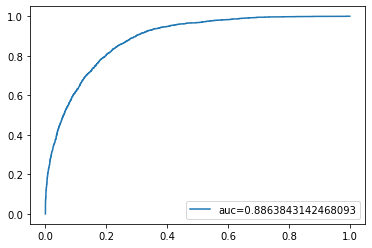

In [90]:
y_pred_proba5 = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba5)
auc = metrics.roc_auc_score(y_test, y_pred_proba5)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 2. L1 regulation and random forest methods

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [126]:
# Read the data
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

In [127]:
adult.columns = ['Age', 'Type_employer', 'Fnlwgt', 'Education',
                 'Education_num', 'Marital', 'Occupation',
                 'Relationship', 'Race', 'Sex','Capital_gain', 
                 'Capital_loss', 'Hr_per_week','Country', 'Wage']

In [128]:
adult.head()

,Age,Type_employer,Fnlwgt,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [118]:
# Feature Selection and Encoding
from sklearn.preprocessing import LabelEncoder

In [119]:
adult = adult.apply(LabelEncoder().fit_transform)
adult.head()

,Age,Type_employer,Fnlwgt,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [120]:
drop_elements = ['Fnlwgt']
adult = adult.drop(drop_elements, axis=1)
adult 

,Age,Type_employer,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country,Wage
0,22,7,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,11,8,4,1,3,4,1,0,0,19,39,0


In [121]:
drop_elements = ['Fnlwgt', 'Wage']
y = adult['Wage']
X = adult.iloc[:,:-1]
X.head()

,Age,Type_employer,Education,Education_num,Marital,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hr_per_week,Country
0,22,7,9,12,4,1,1,4,1,25,0,39,39
1,33,6,9,12,2,4,0,4,1,0,0,12,39
2,21,4,11,8,0,6,1,4,1,0,0,39,39
3,36,4,1,6,2,6,0,2,1,0,0,39,39
4,11,4,9,12,2,10,5,2,0,0,0,39,5


In [122]:
from sklearn.model_selection import train_test_split

# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [123]:
X_train.shape, X_test.shape

((22792, 13), (9769, 13))

In [125]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()
sc.fit(X_train)
# Fit the scaler to the training data and transform
X_train_std = sc.transform(X_train)
# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

### 2.1 L1 regulation

### 2.2 Random Forest

Feature: 0, Score: 0.18005
Feature: 1, Score: 0.05166
Feature: 2, Score: 0.01827
Feature: 3, Score: 0.13142
Feature: 4, Score: 0.01020
Feature: 5, Score: 0.08736
Feature: 6, Score: 0.20834
Feature: 7, Score: 0.01899
Feature: 8, Score: 0.00533
Feature: 9, Score: 0.12222
Feature: 10, Score: 0.04185
Feature: 11, Score: 0.10297
Feature: 12, Score: 0.02135


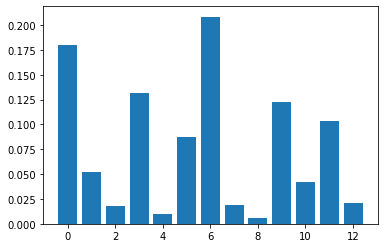

In [113]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()